In [1]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib
from matplotlib.axes import Axes
%matplotlib inline
import numpy as np
import pyvista as pv
import pandas as pd
import xarray as xr
import time

In [2]:
ds = xr.open_dataset('D:/run_5_31/ocean_flt.nc')
dt = xr.open_dataset('D:/run_5_31/ocean_avg_0001.nc')
#dd = xr.open_dataset('/scratch/project_2000789/muramarg/run_5_31/output_WAOM_check/ocean_avg_0001.nc')
#dg = xr.open_dataset('/scratch/project_2000789/boeiradi/waom10_frc/waom10extend_grd.nc')

In [3]:
x = (ds.variables['Xgrid'].values)
y = (ds.variables['Ygrid'].values)
z = (ds.variables['Zgrid'].values)

In [4]:
print(x.shape[0])

23521


## Create the splines to plot in pyvista

In [5]:
def make_points(i):
    """Helper to make XYZ points"""
    z1 = list(z[:,i])
    x1 = list(x[:,i])
    y1 = list(y[:,i])
    return np.column_stack((x1, y1, z1))

In [6]:
def lines_from_points(points):
    """Given an array of points, make a line set"""
    poly = pv.PolyData()
    poly.points = points
    cells = np.full((len(points) - 1, 3), 2, dtype=np.int_)
    cells[:, 1] = np.arange(0, len(points) - 1, dtype=np.int_)
    cells[:, 2] = np.arange(1, len(points), dtype=np.int_)
    poly.lines = cells
    return poly


#line = lines_from_points(points)
#line

## Create the zice mesh

In [7]:
dt.variables['zice'].values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
# zice points
def get_zice_points(zice):
    x = np.array([])
    y = np.array([])
    z = np.array([])
    for i in range(len(zice)):
        for j in range(len(zice[i])):
            if zice[i][j] != 0:
                x = np.append(x,j)
                y = np.append(y,i)
                z = np.append(z,zice[i][j]/1000/10)
                
    return x,y,z
test = dt.variables['zice'].values
xz,yz,zz = get_zice_points(test)

In [19]:
zpts = np.array([xz,yz,zz]).T
point_cloud = pv.PolyData(zpts)
point_cloud

PolyData,Information
N Cells,119793
N Points,119793
X Bounds,"4.600e+01, 5.740e+02"
Y Bounds,"8.500e+01, 5.230e+02"
Z Bounds,"-2.534e-01, -3.069e-10"
N Arrays,0


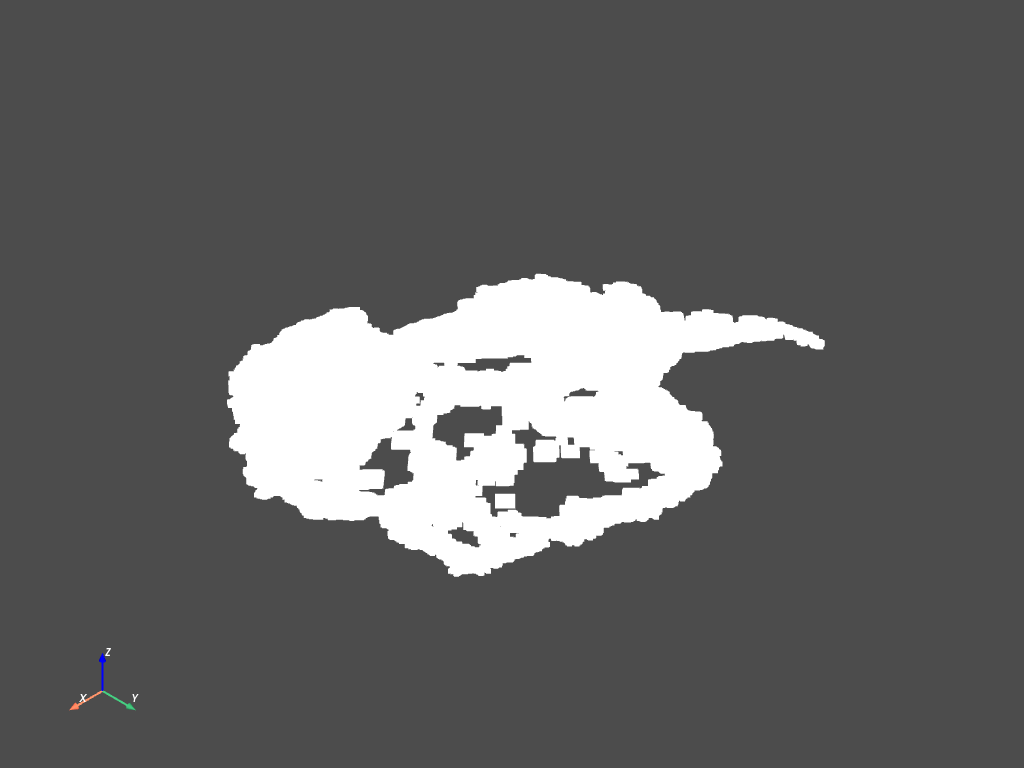

In [20]:
point_cloud.plot()

In [9]:
 # zice points
def get_zice_points(zice):
    value = zice
    x = np.arange(value.shape[0])
    y = np.arange(value.shape[1])
    xx, yy = np.meshgrid(x, y, sparse=False)
    xx = xx.reshape(-1, 1)
    xx = xx.flatten()
    yy = yy.reshape(-1, 1)
    yy = yy.flatten()
    value = value.reshape(-1, 1)
    value = value.flatten()
    value = (value)
    
    return (xx,yy,value)
# test = dt.variables['zice'].values
xz,yz,zz = get_zice_points(test)

In [10]:
zz=zz/1000/10

In [11]:
zpts = np.array([xz,yz,zz]).T
#print(zpts)

In [12]:
z_nonzero = [i for i in zpts if i[2] != 0]
z_nonzero = np.array(z_nonzero)
z_nonzero

array([[ 1.90000000e+02,  9.60000000e+01, -4.26487591e-03],
       [ 1.91000000e+02,  9.60000000e+01, -7.89269085e-03],
       [ 1.92000000e+02,  9.60000000e+01, -1.28831946e-03],
       ...,
       [ 5.09000000e+02,  5.88000000e+02, -2.69610977e-02],
       [ 5.10000000e+02,  5.88000000e+02, -8.65118468e-03],
       [ 5.11000000e+02,  5.88000000e+02, -5.77656563e-04]])

In [ ]:
# plt.figure(figsize=(10, 10))
# plt.scatter(zpts[:, 0], zpts[:, 1], c=zpts[:, 2])
# # another way
# plt.pcolormesh(dg.lon_rho,dg.lat_rho,zice)
# plt.axis("image")
# plt.xlabel("X Coordinate")
# plt.ylabel("Y Coordinate")
# plt.colorbar()
# plt.show()

In [ ]:
# plt.figure(figsize=(10, 10))
# plt.scatter(zpts[:, 0], zpts[:, 1], c=zpts[:, 2])
# plt.axis("image")
# plt.xlabel("X Coordinate")
# plt.ylabel("Y Coordinate")
# plt.colorbar()
# plt.show()

In [14]:
point_cloud = pv.PolyData(z_nonzero)
point_cloud

PolyData,Information
N Cells,119793
N Points,119793
X Bounds,"0.000e+00, 5.590e+02"
Y Bounds,"9.600e+01, 5.880e+02"
Z Bounds,"-2.534e-01, -3.069e-10"
N Arrays,0


C:\Users\muramarg\Anaconda3\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


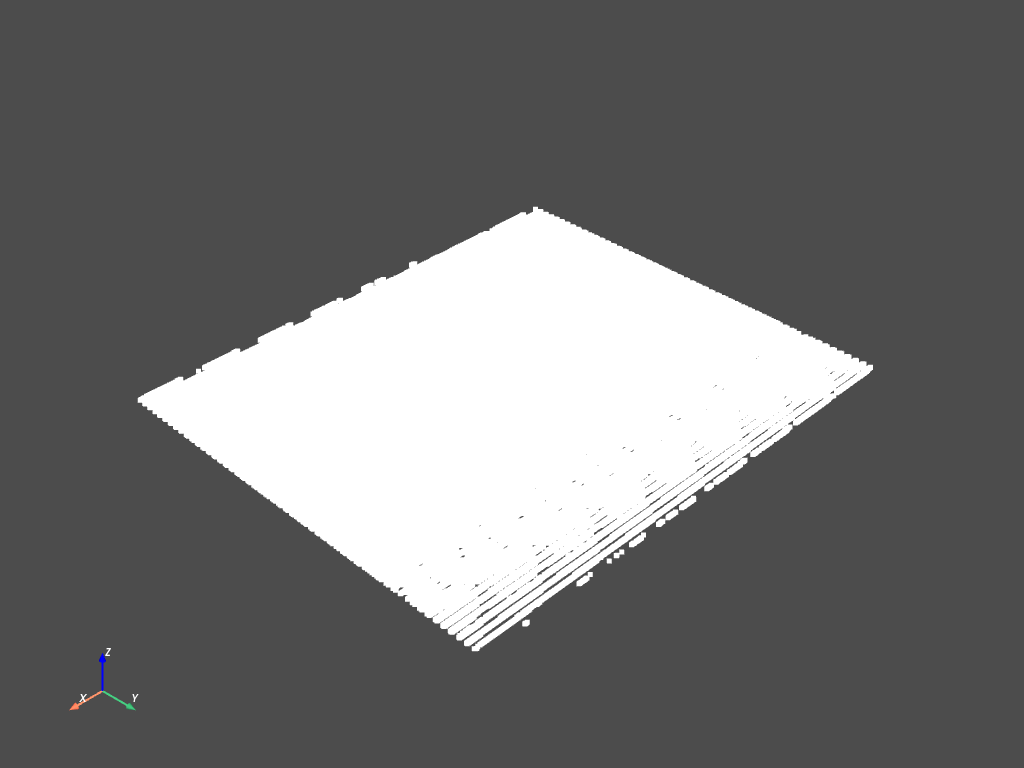

In [15]:
point_cloud.plot()

## Failed attempts to create an elevation mesh

In [ ]:
import pandas as pd

In [ ]:
data = {'X': z_nonzero[:,0],
        'Y': z_nonzero[:,1],
        'Z': z_nonzero[:,2]}

# data = {'X': xz,
#         'Y': yz,
#         'Z': zz}
 
# Create DataFrame
df = pd.DataFrame(data)

In [ ]:
df

In [ ]:
coords = df[['X', 'Y', 'Z']].values

# Make the structured surface manually
structured = pv.StructuredGrid()
# Set coordinates
structured.points = coords
# Set the dimensions of the structured grid
structured.dimensions = [560, 630, 1]

# Apply an Elevation filter
elevation = structured.elevation()
elevation.plot(show_edges=True, show_grid=True)

In [ ]:
grid = pv.create_grid(elevation)

In [ ]:
grid = grid.elevation()
grid

In [ ]:
grid.elevation.plot()

In [ ]:
#pv.global_theme.jupyter_backend = 'panel'

In [13]:
point_cloud.plot(eye_dome_lighting=False)

NameError: name 'point_cloud' is not defined

## Plotting points

0 / 105 in 4.101991653442383e-05
5 / 105 in 0.037636832396189375
10 / 105 in 0.05364277760187785
15 / 105 in 0.06752265294392903
20 / 105 in 0.08025880654652913
25 / 105 in 0.0961413304011027
30 / 105 in 0.11086247762044271
35 / 105 in 0.1267064929008484
40 / 105 in 0.14113986889521282
45 / 105 in 0.1559070070584615
50 / 105 in 0.1741387923558553
55 / 105 in 0.1880792220433553
60 / 105 in 0.20444637139638264
65 / 105 in 0.21788305441538494
70 / 105 in 0.23308732509613037
75 / 105 in 0.24752731323242189
80 / 105 in 0.2633590539296468
85 / 105 in 0.2779419263203939
90 / 105 in 0.2930843472480774
95 / 105 in 0.3078119993209839


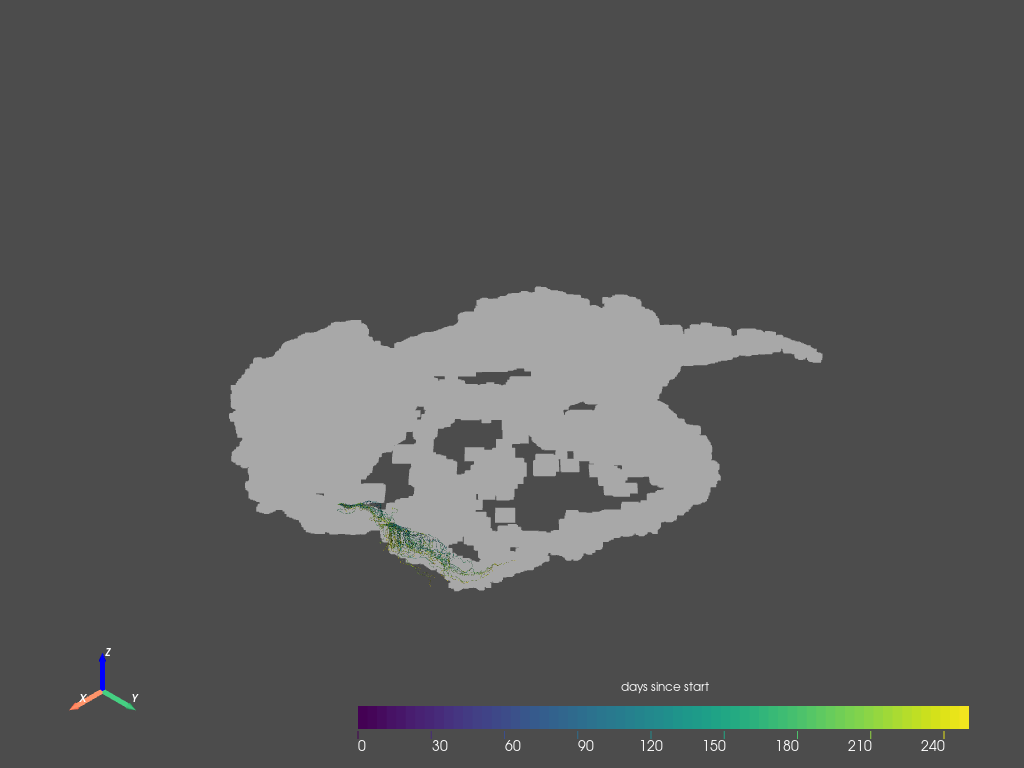

total time: 2.5683030009269716 min


In [21]:
def cast_all_points(zpts):
    start_time = time.time()
    network = pv.MultiBlock()
    network.add_field_data(np.arange(x.shape[0]/900),"time")
    #print(network)
    for i in range(0,100):
        if (i%5 ==0):
            print(i,'/ 105','in',(time.time()-start_time)/60)
        points = make_points(i)
        line = lines_from_points(points)
        line["days since start"] = np.arange(line.n_points)
        tube = line.tube(radius=0.1)
        network.append(tube)
        #line['time'] = np.arange(x.shape[0])
        
        #tube.plot(smooth_shading=True)
        
    # create the scalar bars and plot
    p = pv.Plotter()
    sargs = dict(
        n_labels=0,
        label_font_size = 14
    )
    annotations = {
        0:'0',2820: '30', 5640: '60', 8460:'90',11280: '120', 14100:'150', 16920:'180',
        19740:'210', 22560:'240',   
    }
    p.add_mesh(network, smooth_shading=True,annotations=annotations, scalar_bar_args=sargs)
    
    # add the zice shape
    point_cloud = pv.PolyData(zpts)
    p.add_mesh(point_cloud,smooth_shading=True,color='#a8a8a8')
    
    
    # add the plot axes
    _ = p.add_axes(line_width=5, labels_off=False)
    #_ = p.enable_eye_dome_lighting()
    p.show()
    print('total time:',(time.time()-start_time)/60,'min')
cast_all_points(zpts)

0 / 105 in 0.0001567721366882324
5 / 105 in 0.0385761022567749
10 / 105 in 0.05121468702952067
15 / 105 in 0.06508548657099406
20 / 105 in 0.08043623765309652
25 / 105 in 0.09835502306620279
30 / 105 in 0.1142693559328715
35 / 105 in 0.13252763350804647
40 / 105 in 0.1491225242614746
45 / 105 in 0.1650188366572062
50 / 105 in 0.17964860200881957
55 / 105 in 0.19443641503651937
60 / 105 in 0.20968103806177776
65 / 105 in 0.22398200432459514
70 / 105 in 0.23807847102483112
75 / 105 in 0.25304506222407025
80 / 105 in 0.26729703346888223
85 / 105 in 0.28109259605407716
90 / 105 in 0.2943282723426819
95 / 105 in 0.3092211325963338


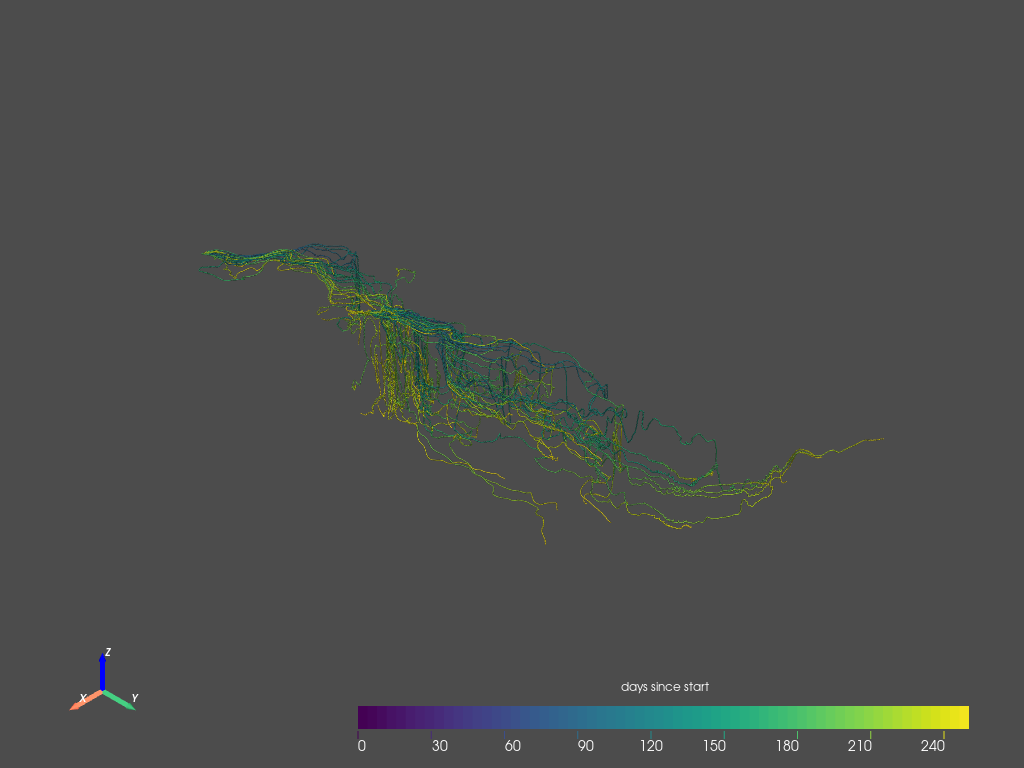

total time: 2.498028365770976 min


In [17]:
def cast_all_points(zpts):
    start_time = time.time()
    network = pv.MultiBlock()
    network.add_field_data(np.arange(x.shape[0]/900),"time")
    #print(network)
    for i in range(0,100):
        if (i%5 ==0):
            print(i,'/ 105','in',(time.time()-start_time)/60)
        points = make_points(i)
        line = lines_from_points(points)
        line["days since start"] = np.arange(line.n_points)
        tube = line.tube(radius=0.1)
        network.append(tube)
        #line['time'] = np.arange(x.shape[0])
        
        #tube.plot(smooth_shading=True)
        
    # create the scalar bars and plot
    p = pv.Plotter()
    sargs = dict(
        n_labels=0,
        label_font_size = 14
    )
    annotations = {
        0:'0',2820: '30', 5640: '60', 8460:'90',11280: '120', 14100:'150', 16920:'180',
        19740:'210', 22560:'240',   
    }
    p.add_mesh(network, smooth_shading=True,annotations=annotations, scalar_bar_args=sargs)
    
    # add the zice shape
    #point_cloud = pv.PolyData(zpts)
    #p.add_mesh(point_cloud,smooth_shading=True,color='#a8a8a8')
    
    
    # add the plot axes
    _ = p.add_axes(line_width=5, labels_off=False)
    #_ = p.enable_eye_dome_lighting()
    p.show()
    print('total time:',(time.time()-start_time)/60,'min')
cast_all_points(zpts)

In [ ]:
# def make_points(i):
#     """Helper to make XYZ points"""
#     z1 = list(z[:,i])
#     x1 = list(x[:,i])
#     y1 = list(y[:,i])
#     return np.column_stack((x1, y1, z1))
# points = make_points(1)
# line = lines_from_points(points)

In [ ]:
# line["scalars"] = np.arange(line.n_points)
# tube = line.tube(radius=0.1)
# tube.plot(smooth_shading=True)

In [ ]:
# p = pv.Plotter()
# p.add_mesh(stream.tube(radius=0.0015))
# p.view_xy()
# p.show(cpos=cpos)